In [10]:
import numpy as np
import os
import json
import json
import plotly.io as pio

from pymatgen.analysis.phase_diagram import *


import matplotlib.pyplot as plt
import matplotlib

fig= plt.figure(figsize=(10,6),)


def mkdir(path):
    folder = os.path.exists(path)
    if not folder:
        os.makedirs(path)
    else:
        print("Folder exists")
        
        
def toOriginalEntries(stable_entries):
    entry_list = []
    for stable in stable_entries:
        entry_list.append(stable.original_entry)
    return entry_list

<Figure size 1000x600 with 0 Axes>

In [11]:
import pickle
with open('./phase_diagram_oct_spinel.pkl', 'rb') as fp:
    pd_oct =pickle.load(fp)
    

In [12]:
import matplotlib.cm as cm
colors = cm.autumn_r(np.linspace(0.25, 1, 100))
colors = cm.RdYlGn_r(np.linspace(0.25, 1, 100))


e_formation_list = []
x_Li_list = []
color_list = []

for entry_un in pd_oct.unstable_entries:
    e_hull = pd_oct.get_e_above_hull(entry_un)
    e_for = pd_oct.get_form_energy(entry_un)/160
    x_Li = entry_un.original_entry.composition['Li'] / 160 *2
    
    e_formation_list.append(e_for)
    x_Li_list.append(x_Li)
    c_idx = min(int(e_hull/0.02 * 100), 99)
    color_list.append(colors[c_idx])
    
    
e_formation_stable_list = []
x_Li_stable_list = []

for entry_s in pd_oct.stable_entries:
    e_for = pd_oct.get_form_energy(entry_s)/160
    x_Li = entry_s.original_entry.composition['Li'] / 160 * 2
    
    e_formation_stable_list.append(e_for)
    x_Li_stable_list.append(x_Li)
    
    

In [13]:
x_Li_list_oct = x_Li_list.copy()
e_formation_list_oct = e_formation_list.copy()
color_list_oct = color_list.copy()

x_Li_stable_list_oct = x_Li_stable_list.copy()
e_formation_stable_list_oct = e_formation_stable_list.copy()

([], [])

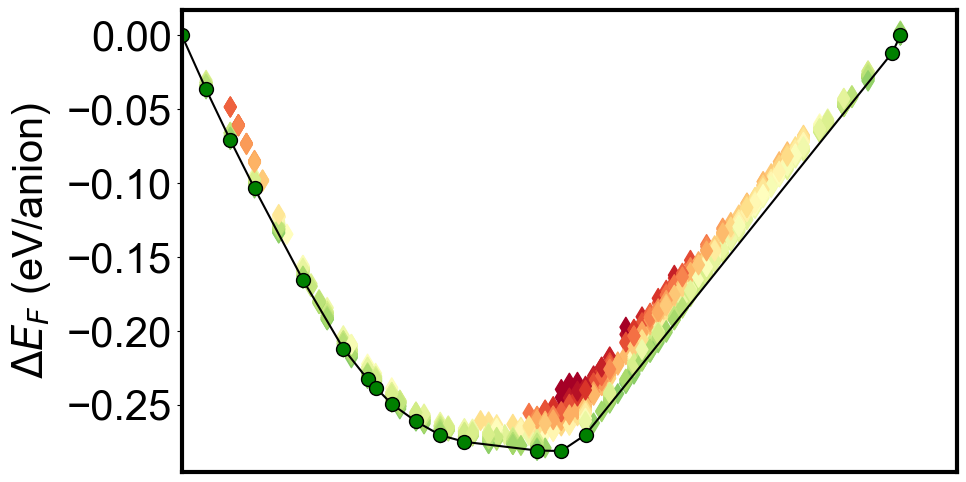

In [14]:

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 30}
matplotlib.rc('font', **font)


fig= plt.figure(figsize=(10,6),)
plt.tight_layout()

ax1 = fig.add_subplot(111)
ax1.spines['bottom'].set_linewidth(3)# inc. width of x-axis and color it green
ax1.spines['top'].set_linewidth(3)# inc. width of x-axis and color it green
ax1.spines['left'].set_linewidth(3)# inc. width of x-axis and color it green
ax1.spines['right'].set_linewidth(3)# inc. width of x-axis and color it green

plt.scatter(x_Li_list_oct, e_formation_list_oct, color = color_list_oct, s = 100, marker = 'd')


plt.plot(np.sort(x_Li_stable_list_oct), np.array(e_formation_stable_list_oct)[np.argsort(x_Li_stable_list_oct)], 
         color = 'k', marker = 'o', markersize = 10, markerfacecolor='green' )

plt.ylabel(r"$\Delta E_F$ (eV/anion)", labelpad=10)
plt.yticks(np.arange(-0.25, 0.01, 0.05))
plt.xlim(0, 1.2)

plt.xticks([])
# fig.savefig('./spinel_e_hull.pdf', bbox_inches = 'tight', pad_inches = 0.1)


In [15]:

def generateVoltageFromEntries(stable_entries, e_Li = -.47495825E+01/2):
    V_series = []
    for i in range(len(stable_entries)-1):
        entry_x1 = stable_entries[i] # low Li
        entry_x2 = stable_entries[i+1] # high Li
#         print(entry_x1, entry_x2)
        num_x1 = entry_x1.composition['O'] + entry_x1.composition['F']
        num_x2 = entry_x2.composition['O'] + entry_x2.composition['F']

        
        x1 = entry_x1.composition['Li'] / num_x1
        x2 = entry_x2.composition['Li'] / num_x2
        
        dE = entry_x1.energy / num_x1 - entry_x2.energy / num_x2
        dx = x1 - x2
        V = -(dE - (x1 - x2) * e_Li) / (x1 - x2)
        V_series.append((x1 * 2,x2* 2,  V))
        
#         print((x1*2,x2*2,  V))
    return V_series     

In [16]:
stable_list_oct = toOriginalEntries(pd_oct.stable_entries)
stable_list_oct.sort(key=  lambda x: x.composition['Li'])

In [17]:
import pickle

with open('./delta_V_series.pkl', 'rb') as fp:
    V_series_delta = pickle.load(fp)

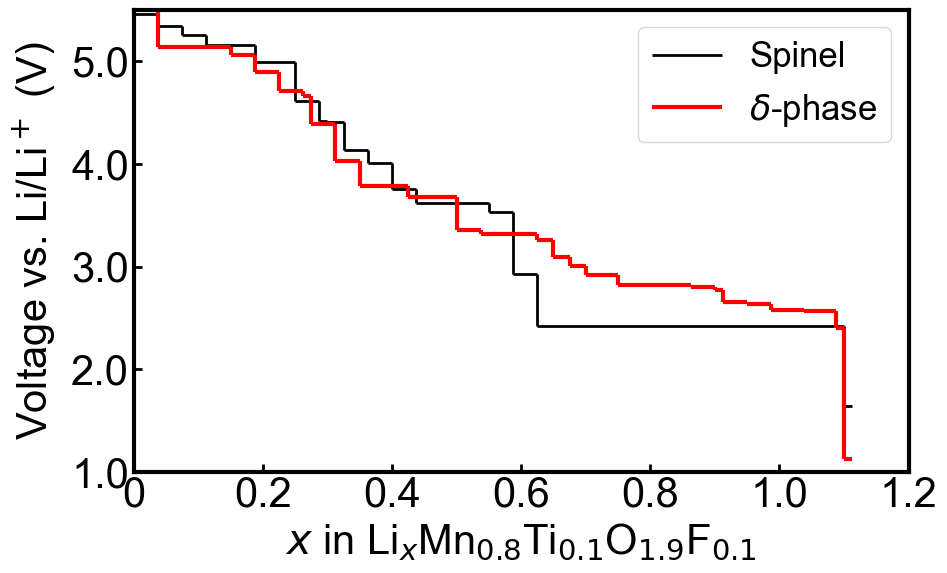

In [18]:
V_series_oct = generateVoltageFromEntries(stable_entries= stable_list_oct)

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 30}
matplotlib.rc('font', **font)


fig= plt.figure(figsize=(10,6),)
plt.tight_layout()

ax1 = fig.add_subplot(111)
ax1.spines['bottom'].set_linewidth(3)# inc. width of x-axis and color it green
ax1.spines['top'].set_linewidth(3)# inc. width of x-axis and color it green
ax1.spines['left'].set_linewidth(3)# inc. width of x-axis and color it green
ax1.spines['right'].set_linewidth(3)# inc. width of x-axis and color it green


        
for ii, combo in enumerate(V_series_oct):
    x_start = combo[0]
    x_end = combo[1]
    V = combo[2]
    if ii != - 0:
        V_old = V_series_oct[ii-1][2]    
        plt.vlines(ymin=V_old, ymax= V, x= x_start, linewidth = 2, color = 'k')

    if ii == 0: 
        plt.hlines(xmin=x_start, xmax= x_end, y = V, linewidth = 2, color = 'k', label = 'Spinel')
    else:
        plt.hlines(xmin=x_start, xmax= x_end, y = V, linewidth = 2, color = 'k')
    
    

for ii, combo in enumerate(V_series_delta):
    x_start = combo[0]
    x_end = combo[1]
    V = combo[2]
    if ii != - 0:
        V_old = V_series_delta[ii-1][2]    
        plt.vlines(ymin=V_old, ymax= V, x= x_start, linewidth = 3, color = 'r', linestyle = '-', alpha = 1)
    if ii == 0: 
        plt.hlines(xmin=x_start, xmax= x_end, y = V, linewidth = 3, color = 'r', linestyle = '-', alpha = 1, label = r'$\delta$-phase')
    else:
        plt.hlines(xmin=x_start, xmax= x_end, y = V, linewidth = 3,color = 'r', linestyle = '-', alpha = 1)
        
plt.xticks(np.arange(0., 1.21, 0.2), ['0', '0.2', '0.4', '0.6', '0.8', '1.0', '1.2'])
plt.yticks(np.arange(1.0, 6.1, 1.0), ['1.0', '2.0', '3.0', '4.0', '5.0', '6.0'])


plt.xlim(0, 1.2)
plt.ylim(1,5.5)

plt.tick_params(axis='both', direction='in',  which='both', width = 2, length = 6)


plt.ylabel("Voltage vs. Li/Li$^+$ (V)", labelpad=10)
plt.xlabel(r"$x$ in Li$_x$Mn$_{0.8}$Ti$_{0.1}$O$_{1.9}$F$_{0.1}$",  labelpad=5)
plt.legend(fontsize = 25)
# fig.savefig('./spinel_V_profile.pdf', bbox_inches = 'tight', pad_inches = 0.1)

plt.show()
